In [81]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [82]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

In [83]:
data = pd.read_csv('albumlist.csv', encoding = "ISO-8859-1", header = None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       501 non-null    object
 1   1       501 non-null    object
 2   2       501 non-null    object
 3   3       501 non-null    object
 4   4       501 non-null    object
 5   5       501 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [84]:
data.head()

,0,1,2,3,4,5
0,Number,Year,Album,Artist,Genre,Subgenre
1,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
2,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
3,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
4,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"


In [85]:
data.describe()

,0,1,2,3,4,5
count,501,501,501,501,501,501
unique,501,57,498,290,64,291
top,Number,1970,Greatest Hits,Bob Dylan,Rock,None
freq,1,26,3,10,249,29


In [86]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [87]:
transactions[:1]

[['Number', 'Year', 'Album', 'Artist', 'Genre', 'Subgenre']]

In [88]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('None', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

,"""Love and Theft""",#1 Record,(What's the Story) Morning Glory?,(pronounced 'leh-'nerd 'skin-'nerd),1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,12 Songs,120,121,122,123,124,125,126,127,...,Vampire Weekend,Van Halen,Van Morrison,Various,Various Artists,Violator,Vitalogy,Vocal,"Vocal, Easy Listening",Volunteers,Voodoo,War,We're Only in It for the Money,Weezer,Weezer (Blue Album),What's Going On,"Whatever People Say I Am, That's What I'm Not",Wheels of Fire,White Blood Cells,White Light/White Heat,Whitney Houston,Who's Next,Wilco,Wild Gift,Willie Nelson,Willy and the Poor Boys,Wire,Wish You Were Here,Workingman's Dead,Wu Tang Clan,X,Yankee Hotel Foxtrot,Year,Younger Than Yesterday,Z,ZZ Top,[Led Zeppelin IV]
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
Rock,0.497006
Funk / Soul,0.075848
Hip Hop,0.057884
1970,0.051896
1972,0.047904


In [90]:
from mlxtend.frequent_patterns import apriori

minsup=[0.01, 0.03, 0.05, 0.1, 0.15]
elaptime=[]
lenres=[]

for supports in minsup:
    t0= time.time()
    result = apriori(onehot, min_support = supports,max_len = 6, use_colnames = True)
    print(len(result))
    t1 = time.time()
    print("Time elapsed: ", t1 - t0)
    elaptime.append(t1-t0)
    lenres.append(len(result))
print(elaptime)
print(lenres)



# Print a preview of the frequent itemsets
results1 = pd.DataFrame(result, columns=['support','itemsets']).sort_values('support',ascending=False)

results1.head()




91
Time elapsed:  0.011001110076904297
21
Time elapsed:  0.006000041961669922
4
Time elapsed:  0.0050013065338134766
1
Time elapsed:  0.003999948501586914
1
Time elapsed:  0.00500178337097168
[0.011001110076904297, 0.006000041961669922, 0.0050013065338134766, 0.003999948501586914, 0.00500178337097168]
[91, 21, 4, 1, 1]


,support,itemsets
0,0.497006,(Rock)


In [91]:
forplot=[]
for i in minsup:
  forplot.append(str(i))

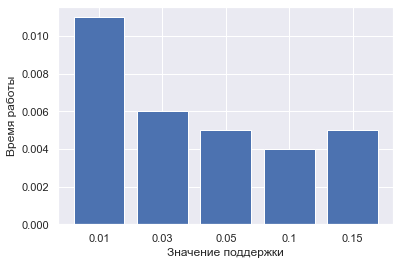

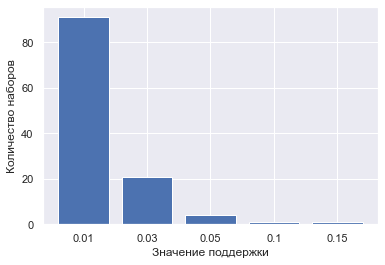

In [92]:
plt.bar(forplot, elaptime)
plt.xlabel("Значение поддержки")
plt.ylabel("Время работы")
plt.show()

plt.bar(forplot, lenres)
plt.xlabel("Значение поддержки")
plt.ylabel("Количество наборов")
plt.show()